In [2]:
import pandas as pd
import numpy as np
import pickle
import re
import string
import spacy
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

In [1]:
from nltk.stem import PorterStemmer
from corextopic import corextopic as ct

In [49]:
tab_columns=['marketplace','customer_id','review_id','product_id','product_parent',
        'product_title','product_category','star_rating','helpful_votes','total_votes',
        'vine','verified_purchase','review_headline','review_body','review_date']

review_df= pd.read_csv('amazon_reviews_us_Major_Appliances_v1_00.tsv',names=tab_columns, 
                       converters={'star_rating':lambda x:x.strip()},
        dtype={'marketplace':str,'customer_id':str,'review_id':str,'product_id':str,
             'product_parent':str, 'product_title':str, 'product_category':str,
             'helpful_votes':str,'total_votes':str, 'vine':str,
             'verified_purchase':str,'review_headline':str,'review_body':str,'review_date':str},
                       sep='\t')
columns=review_df.iloc[-1]
review_df.dropna(inplace=True,subset=['review_body'])
review_df.sort_values(by=['product_id','star_rating','review_date'],ascending=False,inplace=True)


In [50]:
review_df.reset_index(inplace=True, drop=True)
pos_review=review_df[review_df['star_rating']>='3']
neg_review=review_df[review_df['star_rating']<'3']

In [ ]:
stop_words=spacy.lang.en.stop_words.STOP_WORDS
stop_words.add('br')
stop_words.add('\t')
stop_words.add('  ')
stop_words.add('')
nlp = spacy.load('en_core_web_sm')

In [414]:
#    text=re.sub('[%s]' % re.escape(string.punctuation), ' ',text)
#    stemmer=PorterStemmer()
#    tokens=[ stemmer.stem(word.lower()) for word in tokens  ]
def spacy_tok(text):
    ''' Use Spacy library to perform processing and lemmentation.
    '''
    #remove digit
    text1=re.sub('\w*\d\w*', ' ', text)
    text1=re.sub('\<br /\>', '', text1)
    #remove html tag
    text1=re.sub('[;&,-/:#\"\(\)\$\\\<\>]', ' ', text1)
    text1=re.sub('  ',' ',text1)  
    text1=re.sub('  ',' ',text1) 
    tokens=nlp(text1)
    tokens=[ word.lemma_ for word in tokens ]
    #use stop words in vectorizer instead of spacy's stopwords 
    # n't is a stop word in spacy, but not elsewhere
    #tokens=[ word  for word in tokens if (word not in stop_words) ]

    return tokens


In [384]:
example=pos_review['review_body'].tolist()
vectorizer=TfidfVectorizer

In [420]:
example=neg_review['review_body'].tolist()


In [35]:
result=CountVectorizer(max_df=0.6, binary=True, min_df=5,tokenizer=spacy_tok,lowercase=False)
doc_word=result.fit_transform(example)
words=list(np.asarray(result.get_feature_names()))
topic_model = ct.Corex(n_hidden=20, words=words, seed=1)
topic_model.fit(doc_word, words=words, docs=example)
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

In [421]:
result = vectorizer(tokenizer=spacy_tok, max_df=0.6, min_df=5,stop_words='english',lowercase=False)

In [422]:
doc_word = result.fit_transform(example)
lsa = NMF(30)
doc_topic = lsa.fit_transform(doc_word)

/home/lin/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['I', 'ca', 'far', 'make', 'nt'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/home/lin/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [26]:
#pickle.dump(doc_word,open('doc_term2.p','wb'))
#pickle.dump(result,open('result2.p','wb'))
#doc_word=pickle.load(open('doc_term.p','rb'))
#doc_topic=pickle.load(open('topicnmf.p','rb'))
#lsa = TruncatedSVD(30)
#doc_topic = lsa.fit_transform(doc_word)
#pickle.dump(doc_topic,open('topiclsa.p','wb'))
#pickle.dump(lsa,open('modelsvd.p','wb'))

In [98]:
working.iloc[2,13]

"I live in rural Hawaii and our power goes out frequently, sometimes for days at a time.  To keep our food from spoiling we use a combination of generator power or I run it off a deep cycle marine battery charged with solar panels and a 2500 watt power inverter.  That opens up a lot of potential for voltage anomalies and I don't want to fry a $1200.00 refrigerator.  This surge protector is unlike any I have ever seen before.  Usually they just look like an oversized male plug on one side and female on the other.  I've always wondered if they even work.  This unit is different. I like the translucent housing so that you can see the circuit board and electronics inside.<br /><br />I saw some other reviews that indicated they had problems figuring out the unit because the instructions were in Spanish.  Mine didn't come with any instructions though the label was in Spanish.  I'm not sure I understand the confusion because you plug this unit into the wall, plug the appliance into it, and th

In [105]:
working.iloc[15,13]

'Great fan. Quiet. Looks fabulous. Came with incorrect instruction booklet. Fortunately does not take a rocket scientist to install.  Also no means of getting electric cord out of the flew casing. Only works on ceilings up to 8 feet, unless you are willing to mount higher than they suggest.'

In [104]:
working.iloc[16,13]

'This was real nice,good price.'

In [390]:
working=pos_review.reset_index(drop=True)

,comments,unique_comment,diff,percent
product_id,,,,
B00KJ07SEM,1116,70,1046,0.937276
B000JLNBW4,729,55,674,0.924554
B004MX8XO6,601,52,549,0.913478
B002C8HR9A,532,46,486,0.913534
B002MPLYEW,540,55,485,0.898148
...,...,...,...,...
B004DDB22K,1,1,0,0.000000
B004DD9M2M,1,1,0,0.000000
B004DD8S22,1,1,0,0.000000


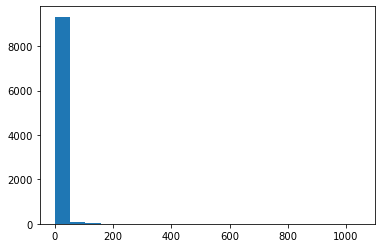

In [391]:
#start end are the inde of the doc_topic matrix, which is different
#from the index of pos_review, which use the roriginal index of review_df
start=1
end=0
threshold=0.6
working['unique_comment']=True
working.iterrows()
for index,i in working.iterrows():
    if working.iloc[index-1,3] == i['product_id']:
        end+=1
        continue
    #end=index+1    
    #Need least two reviews to find similarity 
    
    if end > start+1 :
        prod_sim = cosine_similarity(doc_topic[start:end])        
        offset=len(prod_sim)
        #print(start,end,index,prod_sim)
        for j in range(1,offset):
            for k in range(j):               
                if (prod_sim[j][k] >threshold) and working.iloc[index-offset+k,15]:
                    working.iloc[index-offset+j,15]=False
                    break
    start = end  
    end+=1
neg_data=working.groupby(['product_id']).agg({'marketplace':'count','unique_comment':'sum'})
neg_data.columns=['comments','unique_comment']
neg_data['diff']=neg_data['comments']-neg_data['unique_comment']
neg_data['percent']=neg_data['diff']/neg_data['comments']
plt.hist(neg_data['diff'],bins=20)
plt.savefig('hist_Neg.png',dpi=150,transparent=False)
neg_data.sort_values(by=['diff'],ascending=False)    


In [392]:
working[working['product_id']=='B00KJ07SEM']

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,unique_comment
5098,US,14555366,R35XNT88XVEMK6,B00KJ07SEM,313983847,GE MWF SmartWater Compatible Water Filter Cart...,Major Appliances,5,1,1,N,Y,Five Stars,Super,2015-08-31,True
5099,US,10215462,R2V3WG9G43XHYO,B00KJ07SEM,313983847,GE MWF SmartWater Compatible Water Filter Cart...,Major Appliances,5,1,1,N,Y,perfect fit - water tastes delicious,"Arrived when promised, perfect fit - water tas...",2015-08-31,True
5100,US,42266885,R2T3KWH951QC6W,B00KJ07SEM,313983847,GE MWF SmartWater Compatible Water Filter Cart...,Major Appliances,5,1,1,N,Y,Clean water,Fit as advertised. Just make sure to run a co...,2015-08-31,True
5101,US,13792900,R13LN89MVJFFN5,B00KJ07SEM,313983847,GE MWF SmartWater Compatible Water Filter Cart...,Major Appliances,5,1,1,N,Y,This is a great filter. This is the second fi...,"We loved it!! Installed very easily, no leaks ...",2015-08-30,False
5102,US,18823771,R2MP2YTDUAH31D,B00KJ07SEM,313983847,GE MWF SmartWater Compatible Water Filter Cart...,Major Appliances,5,1,1,N,Y,Five Stars,"Filter work fine, great price too",2015-08-30,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6209,US,38932712,R1K5A7Q23NJJUI,B00KJ07SEM,313983847,GE MWF SmartWater Compatible Water Filter Cart...,Major Appliances,3,0,1,N,Y,Three Stars,it looks good haven't used it yet,2014-09-19,False
6210,US,17198476,R264SAUS302F4D,B00KJ07SEM,313983847,GE MWF SmartWater Compatible Water Filter Cart...,Major Appliances,3,0,1,N,Y,I received the filter today and installed it. ...,I received the filter today and installed it. ...,2014-09-19,False
6211,US,40997506,R2L49DCZNRX3YJ,B00KJ07SEM,313983847,GE MWF SmartWater Compatible Water Filter Cart...,Major Appliances,3,1,3,N,Y,"Seems ok, but not the same as the original ...","Seems ok, but not the same as the original GE ...",2014-09-01,False
6212,US,36188159,R20ES6R7I8I6QC,B00KJ07SEM,313983847,GE MWF SmartWater Compatible Water Filter Cart...,Major Appliances,3,2,4,N,Y,The filter arrived quickly and was easy to ins...,The filter arrived quickly and was easy to ins...,2014-08-05,False


In [394]:
working.iloc[5101,13]

'We loved it!! Installed very easily, no leaks only remember to purge before hand to remove impurities and air in the filter.  Not having to pay the hefty GE price!! Even if GE is compatible with NFS/ANSI 56 and the Waterfall Filter meets NFS/ANSI 42 and not 56, your county water companies many times have to meet even more stringent health standards than 56.  No worry, we will purchase this filter again. Cheers &amp; good drinking!'

In [393]:
working.iloc[5102,13]

'Filter work fine, great price too'

In [423]:
def display_topics(model, feature_names, n_top_words, title='graph',topic_names=None):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for idx, topic in enumerate(model.components_):
        
        if not topic_names or not topic_names[idx]:
            print("\nTopic ", idx)
        else:
            print("\nTopic: '",topic_names[idx],"'")        
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        print(' '.join(top_features))
        weights = topic[top_features_ind]
        #print(weights)
        
        if idx >9:
            continue 
        ax = axes[idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()        

In [417]:
def show_topics(model, feature_names, n_top_words, title='Top 2 topics for Negative Review',topic_names=None):
    fig, axes = plt.subplots(1, 2, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    topic_set={1,0}
    i=0
    for idx, topic in enumerate(model.components_):
        
        if not topic_names or not topic_names[idx]:
            pass # print("\nTopic ", idx)
        else:
            pass # print("\nTopic: '",topic_names[idx],"'")        
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        
        if idx not in topic_set:
            continue 
        ax = axes[i]
        i+=1
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=36)
        #for i in 'top right left'.split():
        #    ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
        
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.savefig('Neg_top2.png',dpi=150,transparent=False)
    plt.show()        

In [409]:
def display_8topics(model, feature_names, n_top_words, title='top topics for Negative Review',topic_names=None):
    fig, axes = plt.subplots(2, 4, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for idx, topic in enumerate(model.components_):
        
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        if idx >9:
            break
        if idx <2:
            continue 
        ax = axes[idx-2]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.savefig('Pos_top8.png',dpi=150,transparent=False)
    plt.show()        

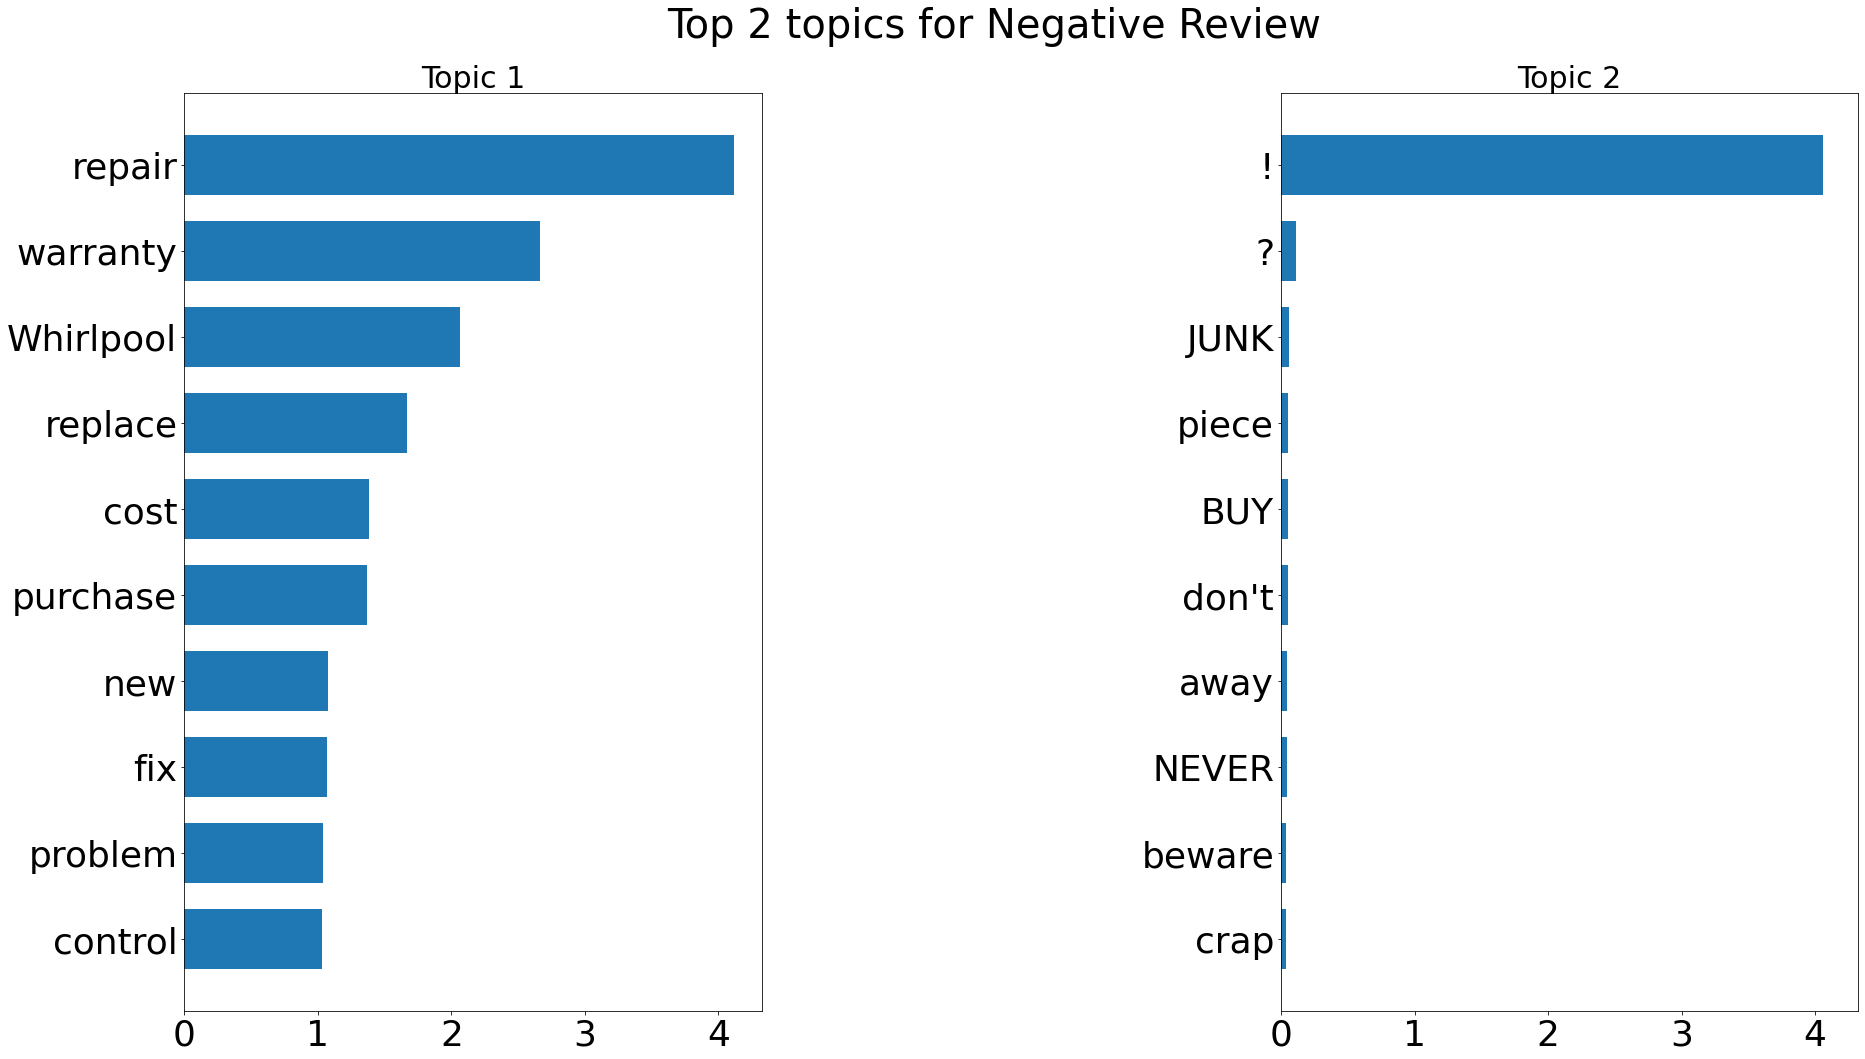

In [418]:
show_topics(lsa, result.get_feature_names(),10)


Topic  0
service customer week repair say tell company day problem fix

Topic  1
! buy ? piece JUNK BUY don't bad junk crap

Topic  2
clothe wash load cycle clean spin dry rinse time wet

Topic  3
ice maker make cube melt tray freezer freeze time produce

Topic  4
unit wine cool temperature degree cooler bottle temp cold set

Topic  5
dishwasher dish clean rack Bosch wash dry quiet cycle run

Topic  6
filter taste GE instal original brand flow OEM replace replacement

Topic  7
work stop week great day fine quit just light properly

Topic  8
oven range stove burner cook heat control gas knob temperature

Topic  9
fridge cold cool freezer temperature degree wine food mini drink

Topic  10
n't ca wo buy know just 've thing cold think

Topic  11
  ?    say cost * tell pay model know

Topic  12
door open close handle design fall seal shelf freezer hinge

Topic  13
year buy warranty repair replace cost ago old just new

Topic  14
microwave GE heat food appliance new magnetron model turn key

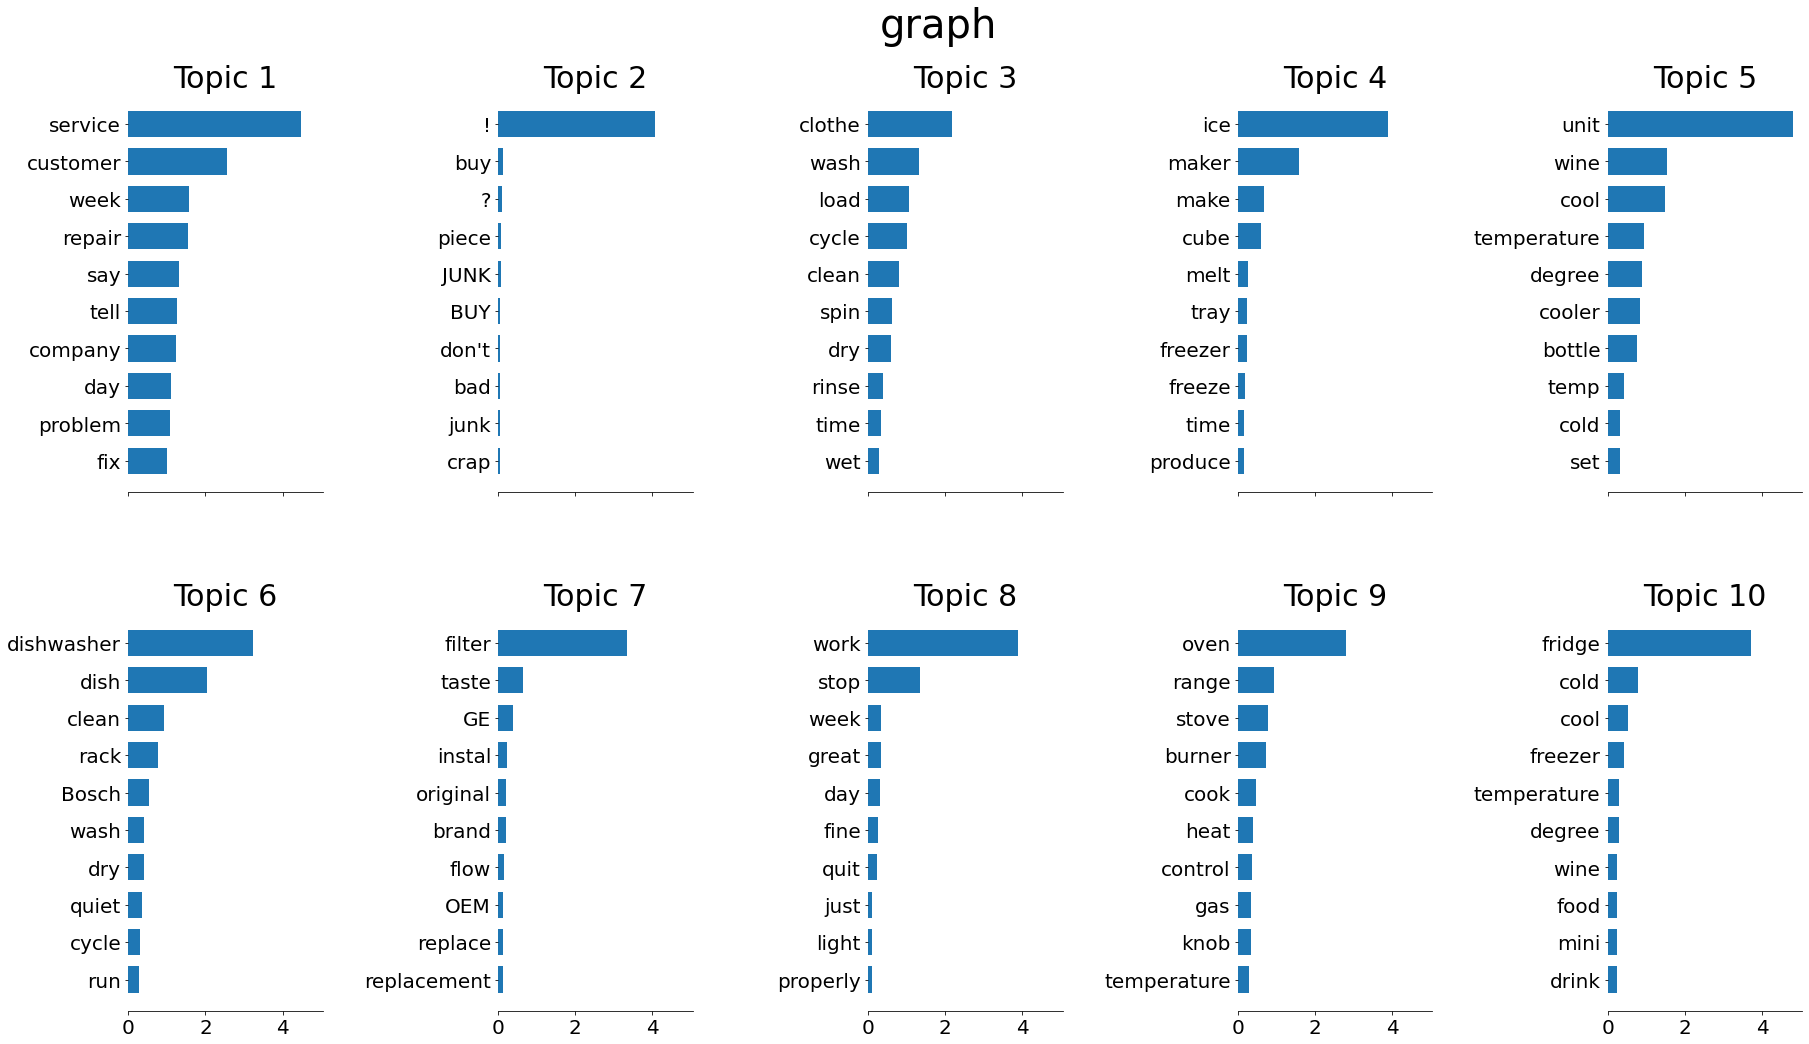

In [424]:
display_topics(lsa, result.get_feature_names(),10)
#keep ' in preprocessing'

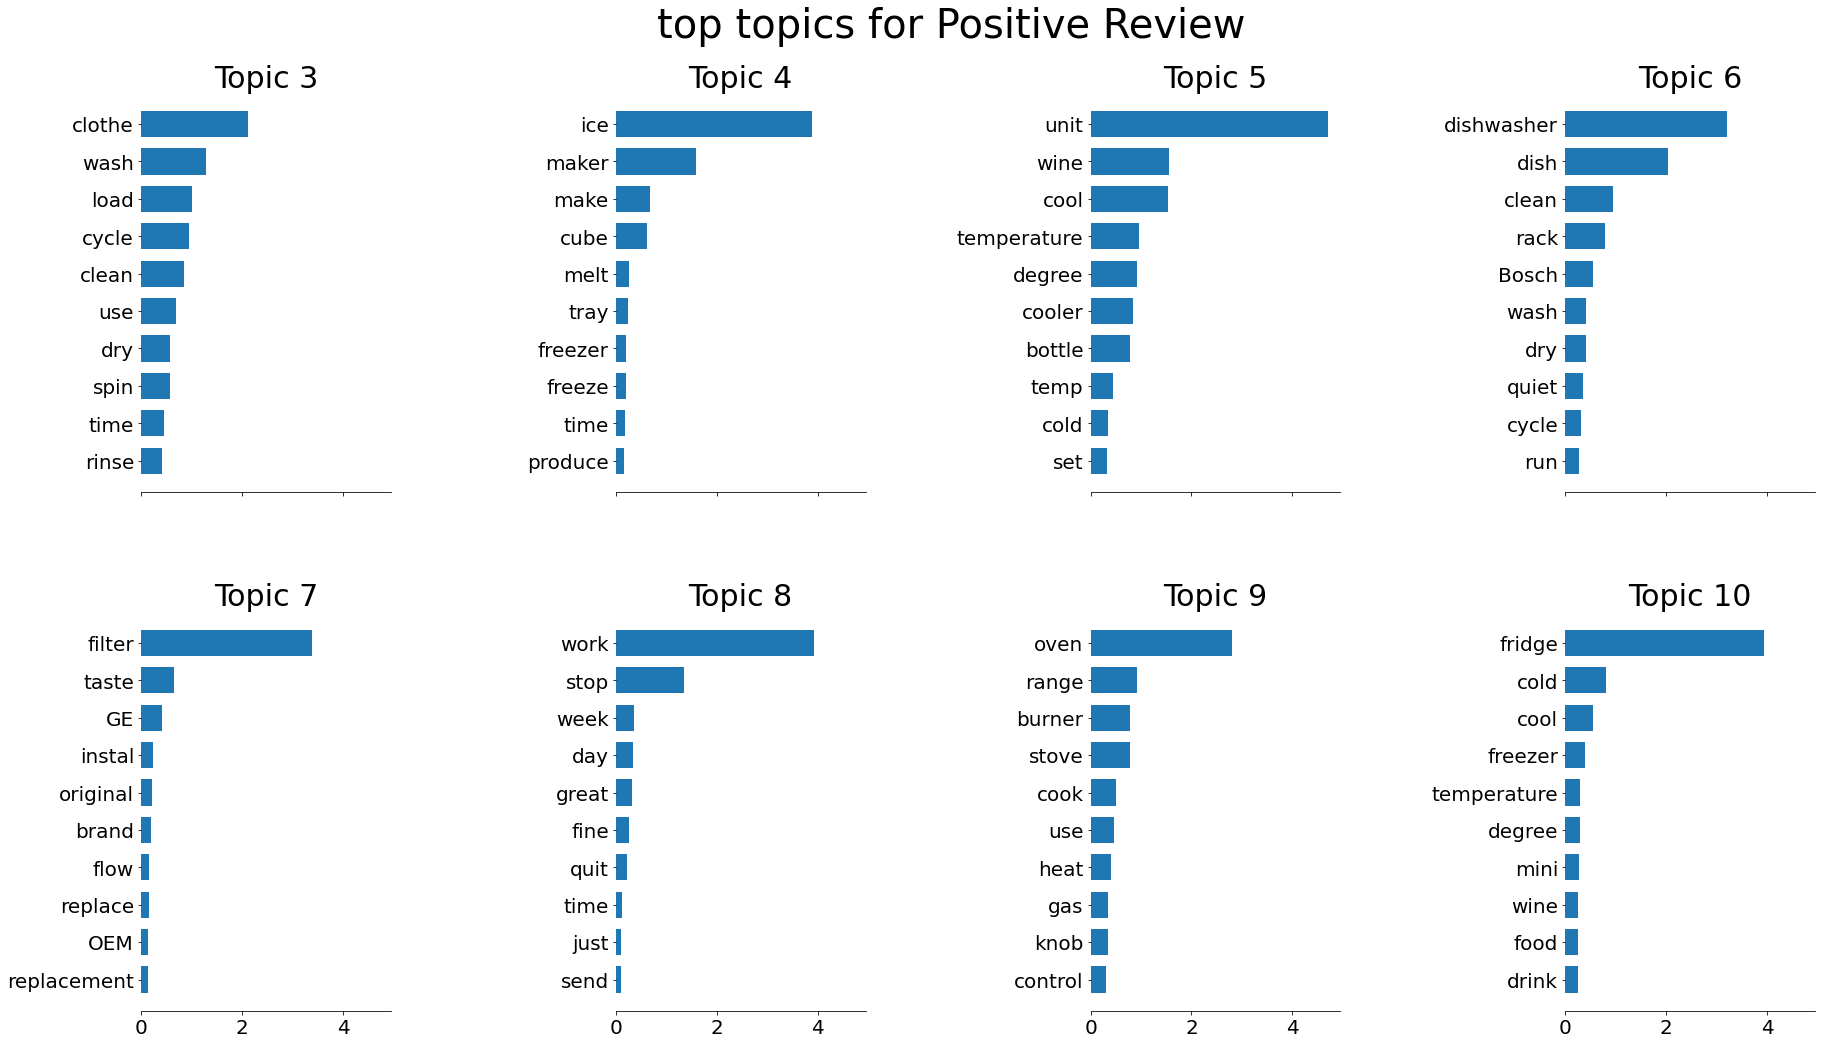

In [419]:
display_8topics(lsa, result.get_feature_names(),10)


In [207]:
token1=nlp("this   great &  # $2 doesn't mean i want Great  US whole BEAN to do a 1986 book? <br/> After this! Then when I.")

In [234]:
spacy_tok(text0)

' hen the switches are changed you could receive'

In [361]:
result.vocabulary_['  ']

1